In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
dataset = pd.read_csv('IMDB Dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
dataset = dataset[:1000]

In [4]:
data_vector = TfidfVectorizer(stop_words='english',ngram_range=(1,3))
data_vector = data_vector.fit_transform(dataset['review'].values.tolist())
data_vector.shape

(1000, 218092)

In [5]:
binary_label = []
for i in range(len(dataset)):
    if (dataset['sentiment'][i]=='positive'):
        binary_label.append(1)
    else:
        binary_label.append(0)
dataset['Binary'] = binary_label
dataset.head()

,review,sentiment,Binary
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [6]:
def vectorize(data):
    cv=CountVectorizer()
    fit_data_cv=cv.fit_transform(data)
    return fit_data_cv,cv

In [7]:
data_vect=dataset['review'].values
train_data_cv,cv= vectorize(data_vect)

In [8]:
pca=PCA(n_components=2,random_state=42)
pca_result=pca.fit_transform(train_data_cv.toarray())
labels = dataset['Binary'].values

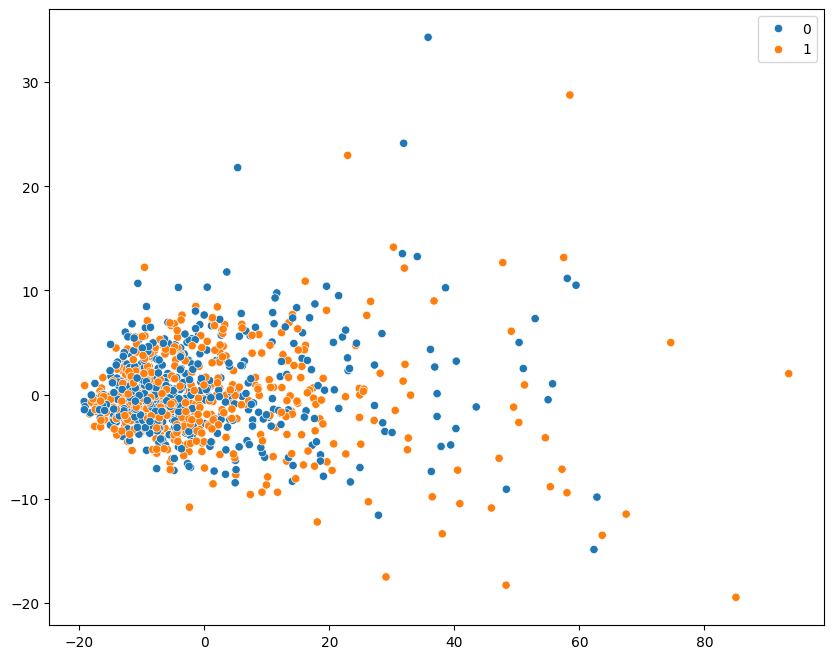

In [9]:
plt.figure(figsize=(10,8))
colors=['orange','red']
sns.scatterplot(x=pca_result[:,0],y=pca_result[:,1],hue=labels)
plt.show()